# Teorema do Limite Central

## Exemplo 1 - Moeda Justa

Considere:
- temos uma moeda justa;
- esta moeda é lançada $n$ vezes
- sabemos que a média da distribuição $\mu = n \times p$
- represente a distribuição da média amostral

In [2]:
### Algumas variáveis
p <- 0.5 # probabilidade de cara

### algumas funções... apenas para diminuir a quantidade de código nas próximas células

# retorna a probabilidade de X estar entre os limites inferior e superior retornados na função acima
calc_dist <- function (n, tamanho, seed=123) {
    
    # inicializa o gerador de números aleatórios
    set.seed (seed)
    
    # cria o vetor que irá guardar as médias
    medias <- rep(0, tamanho)
       
    # laço principal
    for (i in 1:tamanho) {
    
        # seleciona n números aleatórios segundo a distribuição binomial com probabilidade p
        x <- rbinom (n, 1, p)
    
        # guarda a presente média
        medias [i] <- mean(x)
        
    }    

    
    # pega a média e o desvio-padrão da distribuição
    mu <- p
    sigma <- sqrt(p * (1-p) / n)
    
    fun.1 <- function (x) dnorm(x, mean=mu, sd=sigma)
    
    library (ggplot2)
    
    df <- as.data.frame(medias)
    p <- ggplot(df, aes(x=medias)) +
        geom_histogram(aes(y=..density..), binwidth=density(df$medias)$bw) + 
        stat_function(fun = fun.1) + xlim(mu-3*sigma,mu+3*sigma)
    
    plot (p)
}

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


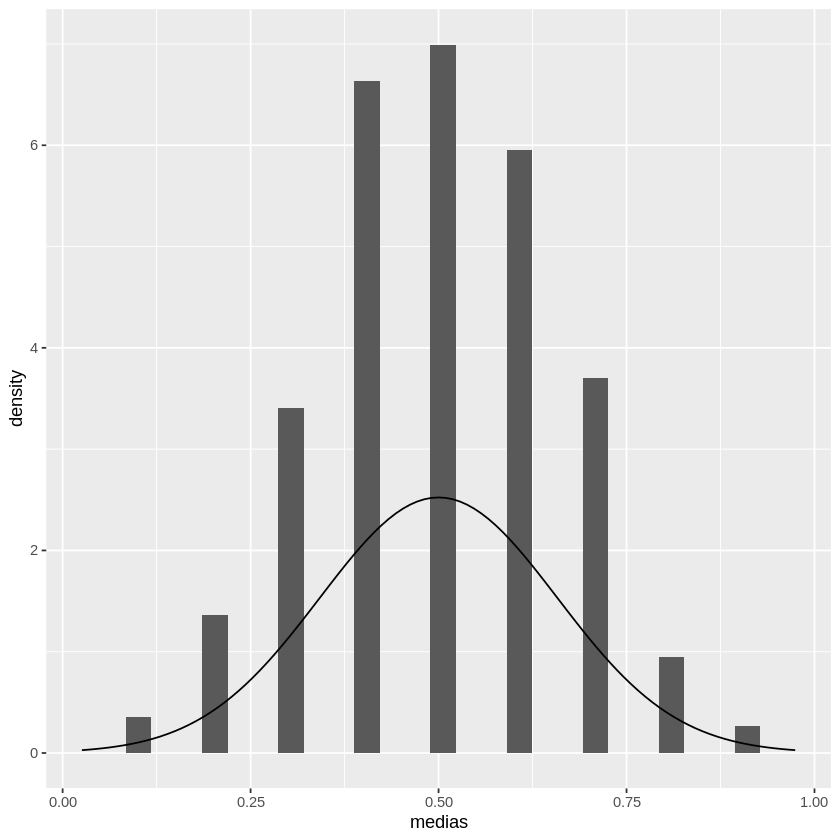

In [3]:
# 10 moedas
calc_dist (10, 1000)

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


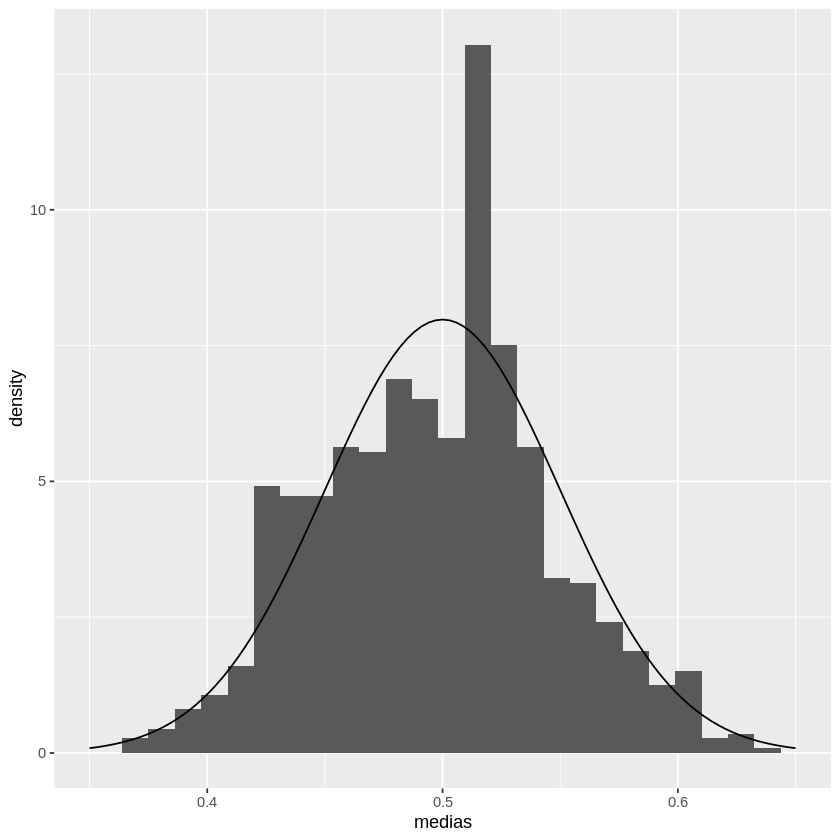

In [4]:
# 100 moedas
calc_dist (100, 1000)

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


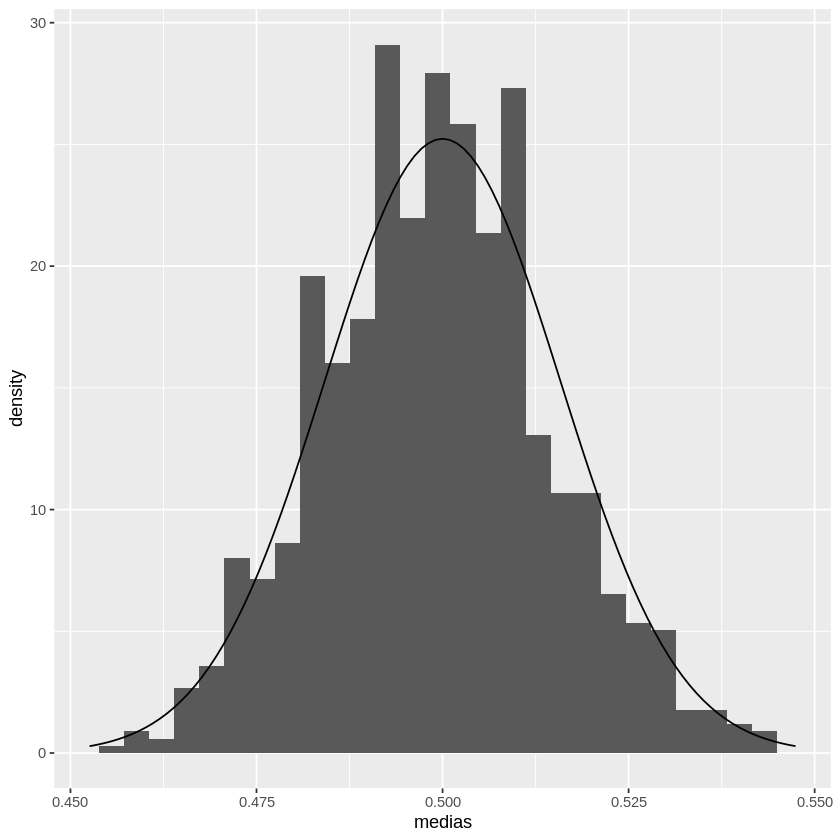

In [5]:
# 1000 moedas
calc_dist (1000, 1000)

## Exemplo 2: Lançamento de Dados

Considere:
- um dado de 6 faces justo
- $X$ é a face que cai em cada jogada
- qual é a média e desvio padrão amostrais para $n$ observaçóes desta variável?

In [10]:
### Em primeiro lugar, vamos determinar a média e o desvio padrão da distribuição
x <- 1:6
px <- rep(1/6, 6)
Ex  <- sum(x*px)
Ex2 <- sum(x^2*px)
sigma2 <- Ex2 - Ex^2
print(paste('A média da distribuição é ',Ex))
print(paste('O desvio-padrão da distribuição é',sqrt(sigma2)))

calc_dado <- function (n, tamanho=1000, seed=123) {
     # inicializa o gerador de números aleatórios
    set.seed (seed)
    
    # cria o vetor que irá guardar as médias
    medias <- rep(0, tamanho)
       
    # laço principal
    for (i in 1:tamanho) {
    
        # gera n valores inteiros dentro da sequência x (1:6), os valores podem se repetir
        rand <- sample (x, n, replace=T)
    
        # guarda a presente média
        medias [i] <- mean(rand)
        
    }    

    
    # pega a média e o desvio-padrão da distribuição
    mu <- Ex
    sigma <- sqrt(sigma2 / n)
    
    fun.1 <- function (x) dnorm(x, mean=mu, sd=sigma)
    
    library (ggplot2)
    
    df <- as.data.frame(medias)
    p <- ggplot(df, aes(x=medias)) +
        geom_histogram(aes(y=..density..), binwidth=density(df$medias)$bw) + 
        stat_function(fun = fun.1) + xlim(mu-3*sigma,mu+3*sigma)
    
    plot (p)
        
    
    print (paste('Média amostral = ', mean(medias)))
    
    print (paste('desvio-padrão amostral = ', sd(medias)^2))
}

[1] "A média da distribuição é  3.5"
[1] "O desvio-padrão da distribuição é 1.70782512765993"


Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


[1] "Média amostral =  3.4697"
[1] "desvio-padrão amostral =  0.307058968968969"


[1] 0.5400617

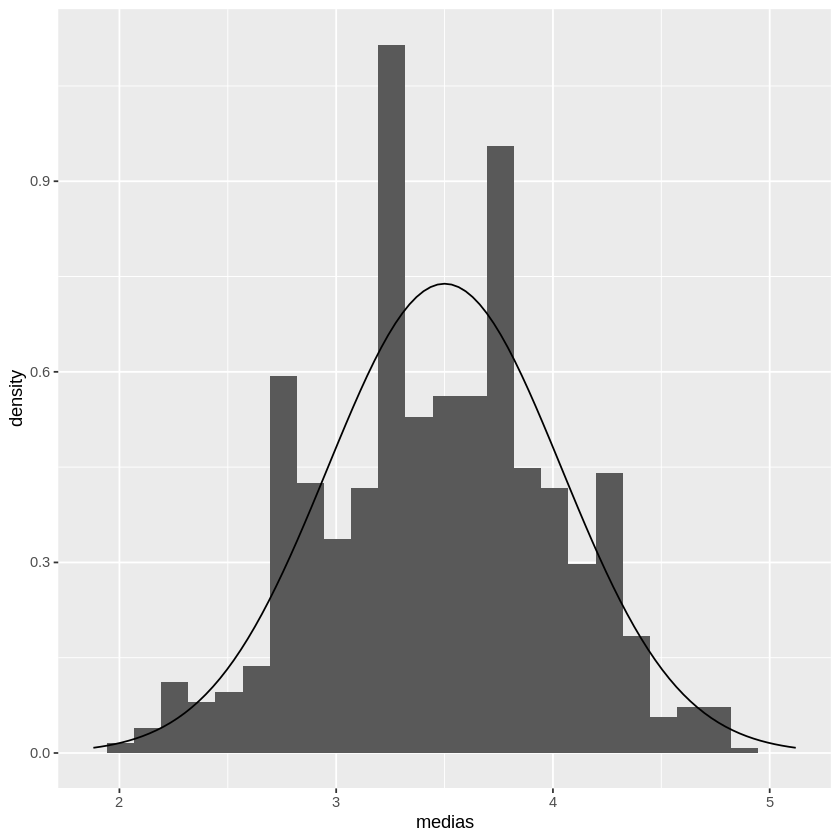

In [12]:
# n = 10
calc_dado (10)
1.70782512765993/sqrt(10)

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


[1] "Média amostral =  3.49489"
[1] "desvio-padrão amostral =  0.0286862741741742"


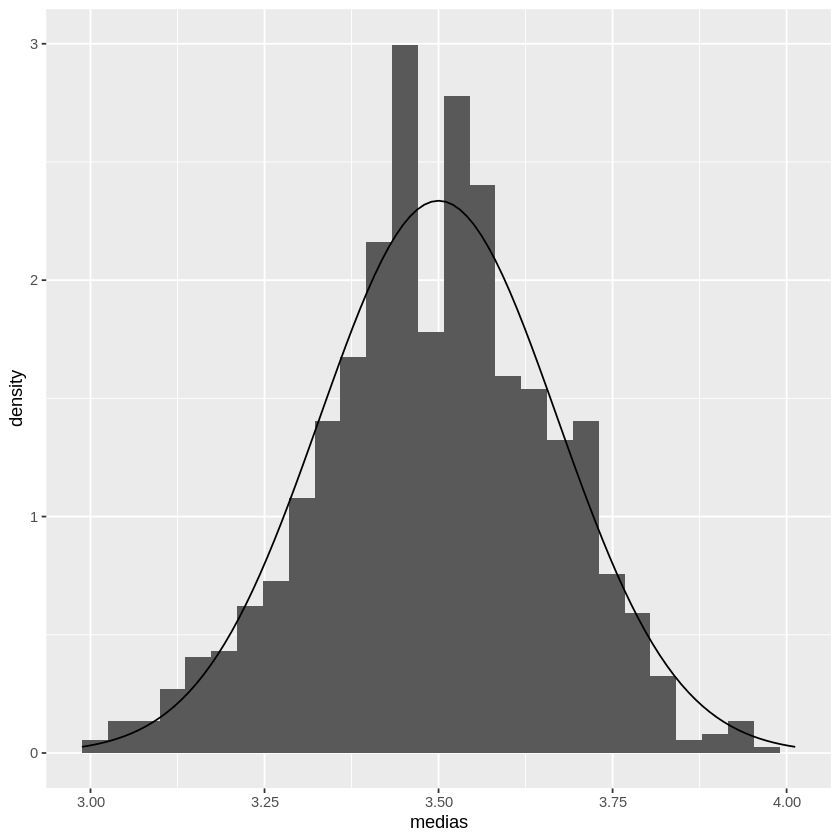

In [13]:
# n = 100
calc_dado (100)

In [14]:
# n = 1000
calc_dado (1000)

Warning message:
“Removed 3 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


[1] "Média amostral =  3.498939"
[1] "desvio-padrão amostral =  0.00312038966866867"


In [112]:
# n = 10000
calc_dado (10000)

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


[1] "Média amostral =  3.4969"
[1] "desvio-padrão amostral =  1.69996452255269"


## Exemplo 3 : Distribuição de Poisson

Considere:
- uma variável aleatória $X$ que segue uma distribuição de Poisson
- $\lambda = 1$
- qual é a média e o desvio-padrão amostrais para $n$ observações desta variável?

In [106]:
### Algumas variáveis e funções
lambda <- 1

## chamando biblioteca ggplot
library (ggplot2)


do_the_job <- function (n, seed=123) {
    # reseta o gerador de números aleatórios
    set.seed (seed)
    
    # gera n números aleatórios segundo a dsitribuição de poisson
    nbrs <- rpois (n, lambda=lambda)
    
    # gera o gráfico
    # my_hist <- hist(nbrs, xlab="X", ylab="Probabilidade", main=paste("Distribuição de Poisson - n =", n), probability=T)
    
    ## cria um data.frame a partir da tabela de contingencia dos numeros aleatorios criados
    df <- as.data.frame(table (nbrs))
    
    ## adiciona uma coluna ao data.frame criado no passo anterior contendo o valor da distribuicao de Poisson
    ## para os valores de X sorteados anteriormente
    x <- as.numeric(levels(df$nbrs))
    dist <- dpois(x, lambda=lambda)
    df[, "pois" ] <- dist
 
    # mostra o gráfico dos valores obtidos
    p <- ggplot(df) +
      geom_col (aes(x = nbrs, y = Freq/n), size = 1, color = "darkblue", fill = "white") +
      geom_line(aes(x = nbrs, y = pois), size = 1.5, color="red", group = 1)

    print (p)
    
    print(paste('Média da distribuição =',lambda))
    # cálculo da média amostral
    print (paste('Média amostral = ', mean(nbrs)))
    
    print(paste('Desvio-padrão da distribuição =',sqrt(lambda)))
    # cálculo da média amostral
    print (paste('desvio-padrão amostral = ', sd(nbrs)))
    
}


calc_poisson <- function (n, tamanho=1000, seed=123) {
     # inicializa o gerador de números aleatórios
    set.seed (seed)
    
    # cria o vetor que irá guardar as médias
    medias <- rep(0, tamanho)
       
    # laço principal
    for (i in 1:tamanho) {
    
        # gera n valores inteiros dentro da sequência x (1:6), os valores podem se repetir
        rand <- rpois (n, lambda=lambda)
    
        # guarda a presente média
        medias [i] <- mean(rand)
        
    }    

    
    # pega a média e o desvio-padrão da distribuição
    mu <- lambda
    sigma <- sqrt(lambda / n)
    
    fun.1 <- function (x) dnorm(x, mean=mu, sd=sigma)
    
 
    df <- as.data.frame(medias)
    p <- ggplot(df, aes(x=medias)) +
        geom_histogram(aes(y=..density..), binwidth=density(df$medias)$bw) + 
        stat_function(fun = fun.1) + xlim(mu-3*sigma,mu+3*sigma)
    
    plot (p)
        
    print (paste('Média amostral = ', mean(medias)))
    
    print (paste('desvio-padrão amostral = ', sd(medias)))
}


Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


[1] "Média amostral =  0.9924"
[1] "desvio-padrão amostral =  0.309674245196688"


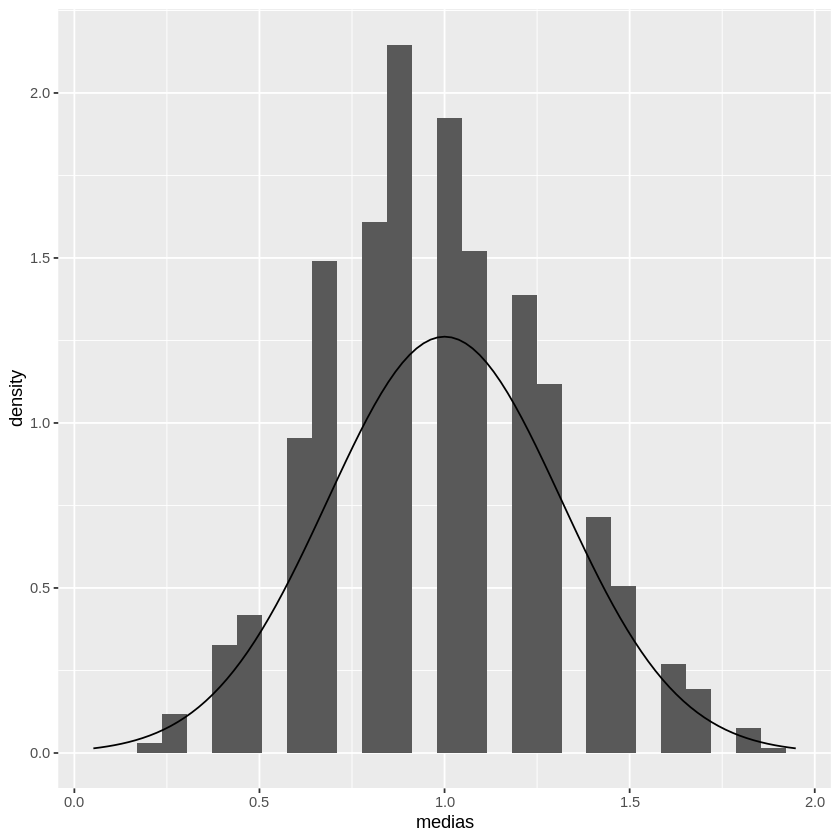

In [107]:
# n = 10
calc_poisson(10, seed=123)

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


[1] "Média amostral =  0.99831"
[1] "desvio-padrão amostral =  0.0965254425582243"


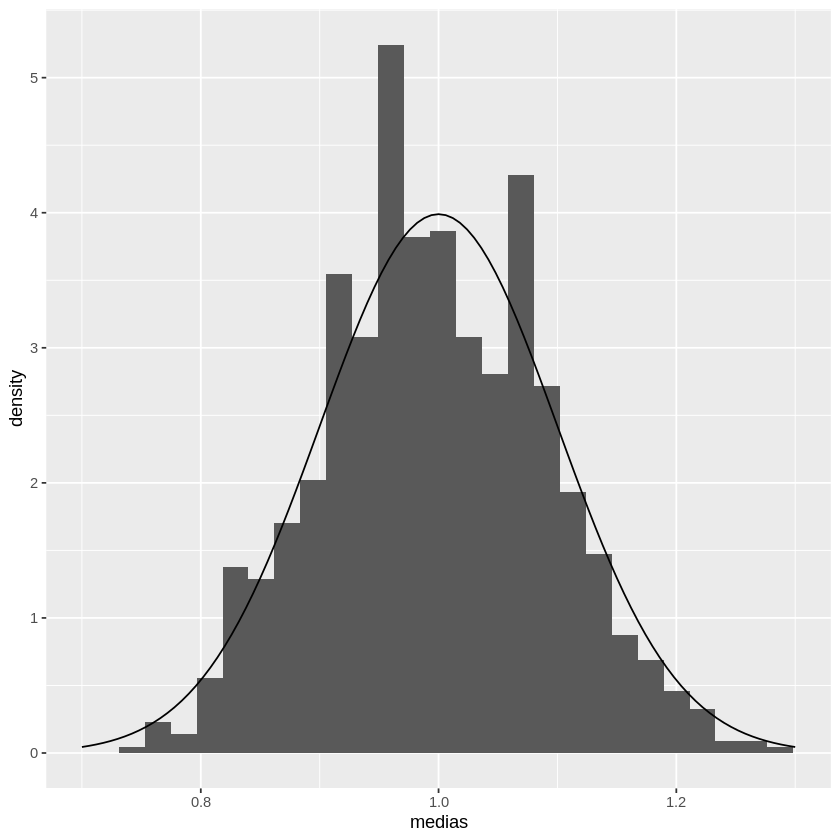

In [83]:
# n = 100
calc_poisson (100)

Warning message:
“Removed 3 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


[1] "Média amostral =  0.998865"
[1] "desvio-padrão amostral =  0.0304211146938967"


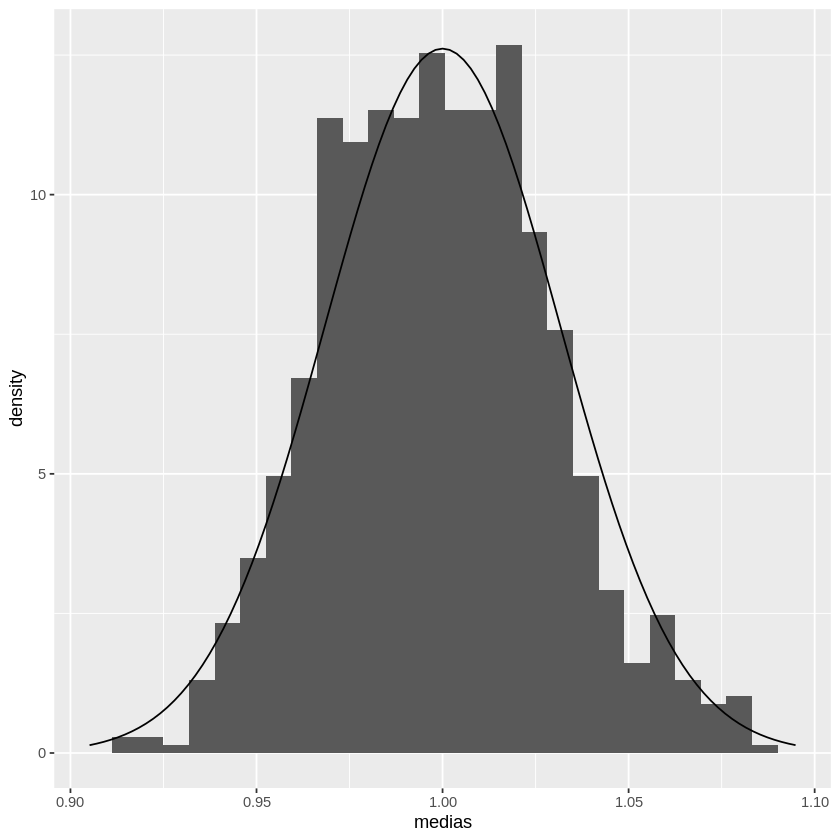

In [84]:
# n = 1000
calc_poisson (1000)

## Exemplo 4: Diferença entre as Médias de Dois Dados

Considere que temos um dado A de 6 faces e outro dado B com 12 faces. Realizamos $n_1$ jogadas do dado A e $n_2$ jogadas do dado B. A variável $Y$ é a diferença entre estas médias. 

In [101]:
# dado A
print ('*** Dado A ***')
nbr <- 6 # 6 faces
xA <- 1:nbr
pxA <- rep(1/nbr, nbr)
ExA  <- sum(xA*pxA)
Ex2A <- sum(xA^2*pxA)
sigma2A <- Ex2A - ExA^2
print(paste('A média da distribuição é ',ExA))
print(paste('O desvio-padrão da distribuição é',sqrt(sigma2A)))

# dado B
print ('*** Dado B ***')
nbr <- 12 # 12 faces
xB <- 1:nbr
pxB <- rep(1/nbr, nbr)
ExB  <- sum(xB*pxB)
Ex2B <- sum(xB^2*pxB)
sigma2B <- Ex2B - ExB^2
print(paste('A média da distribuição é ',ExB))
print(paste('O desvio-padrão da distribuição é',sqrt(sigma2B)))

calc_dif_dado <- function (nA, nB, tamanho=1000, seed=123) {
     # inicializa o gerador de números aleatórios
    set.seed (seed)
    
    # cria o vetor que irá guardar as médias
    medias <- rep(0, tamanho)
       
    # laço principal
    for (i in 1:tamanho) {
    
        # gera n valores inteiros dentro da sequência x (1:6), os valores podem se repetir
        randA <- sample (xA, nA, replace=T)
        randB <- sample (xB, nB, replace=T)
    
        # guarda a presente média
        medias [i] <- mean(randA) - mean(randB)
        
    }    

    
    # pega a média e o desvio-padrão da distribuição
    mu <- ExA - ExB
    sigma <- sqrt((sigma2A / nA) + (sigma2B / nB))
    
    print (paste('Média teórica = ',mu))
    print (paste('Desvio-padrão teórico = ',sigma))
    
    fun.1 <- function (x) dnorm(x, mean=mu, sd=sigma)
    
    library (ggplot2)
    
    df <- as.data.frame(medias)
    p <- ggplot(df, aes(x=medias)) +
        geom_histogram(aes(y=..density..), binwidth=density(df$medias)$bw) + 
        stat_function(fun = fun.1) + xlim(mu-3*sigma,mu+3*sigma)
    
    plot (p)
        
    
    print (paste('Média amostral = ', mean(medias)))
    
    print (paste('desvio-padrão amostral = ', sd(medias)))
}

[1] "*** Dado A ***"
[1] "A média da distribuição é  3.5"
[1] "O desvio-padrão da distribuição é 1.70782512765993"
[1] "*** Dado B ***"
[1] "A média da distribuição é  6.5"
[1] "O desvio-padrão da distribuição é 3.45205252953466"


[1] "Média teórica =  -3"
[1] "Desvio-padrão teórico =  1.21792172709634"


Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


[1] "Média amostral =  -3.0329"
[1] "desvio-padrão amostral =  1.19907688468062"


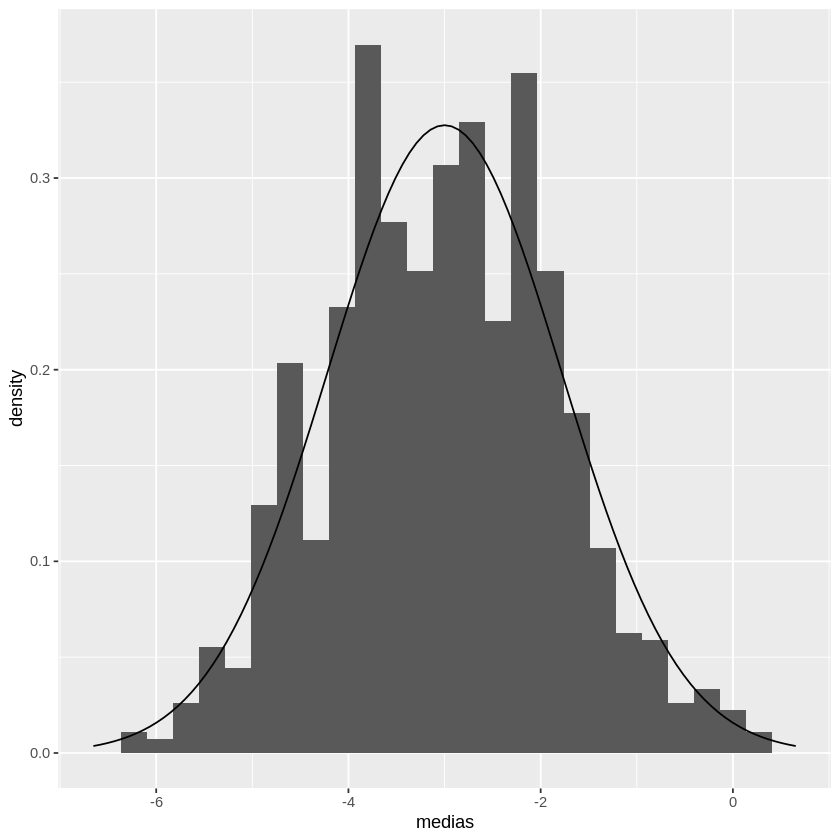

In [102]:
calc_dif_dado(10,10)

[1] "Média teórica =  -3"
[1] "Desvio-padrão teórico =  0.385140666943045"


Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


[1] "Média amostral =  -3.00072"
[1] "desvio-padrão amostral =  0.377389857713088"


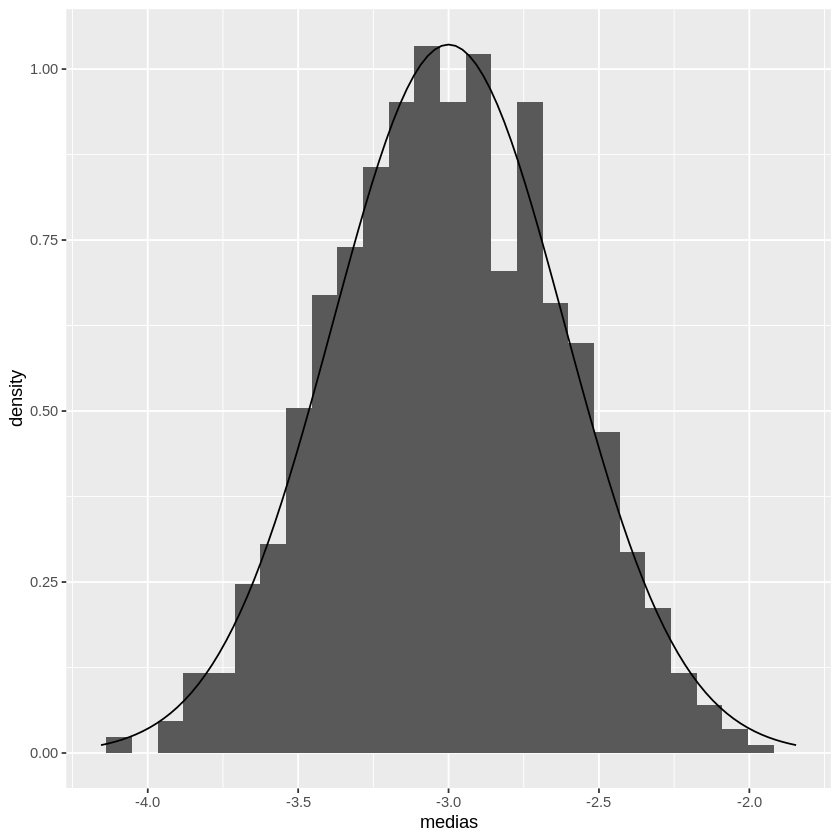

In [103]:
calc_dif_dado(100,100)

[1] "Média teórica =  -3"
[1] "Desvio-padrão teórico =  0.121792172709634"


Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


[1] "Média amostral =  -3.001862"
[1] "desvio-padrão amostral =  0.122846205257412"


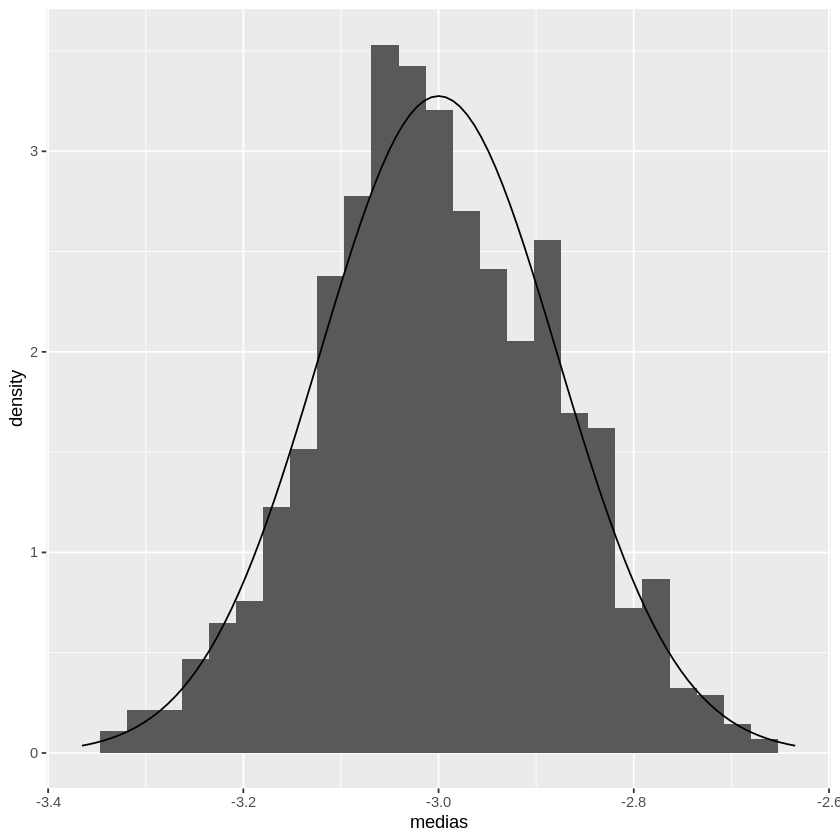

In [104]:
calc_dif_dado(1000,1000)

[1] "Média teórica =  -3"
[1] "Desvio-padrão teórico =  0.0385140666943045"


Warning message:
“Removed 2 rows containing missing values (geom_bar).”


[1] "Média amostral =  -2.9986939"
[1] "desvio-padrão amostral =  0.038446556288964"


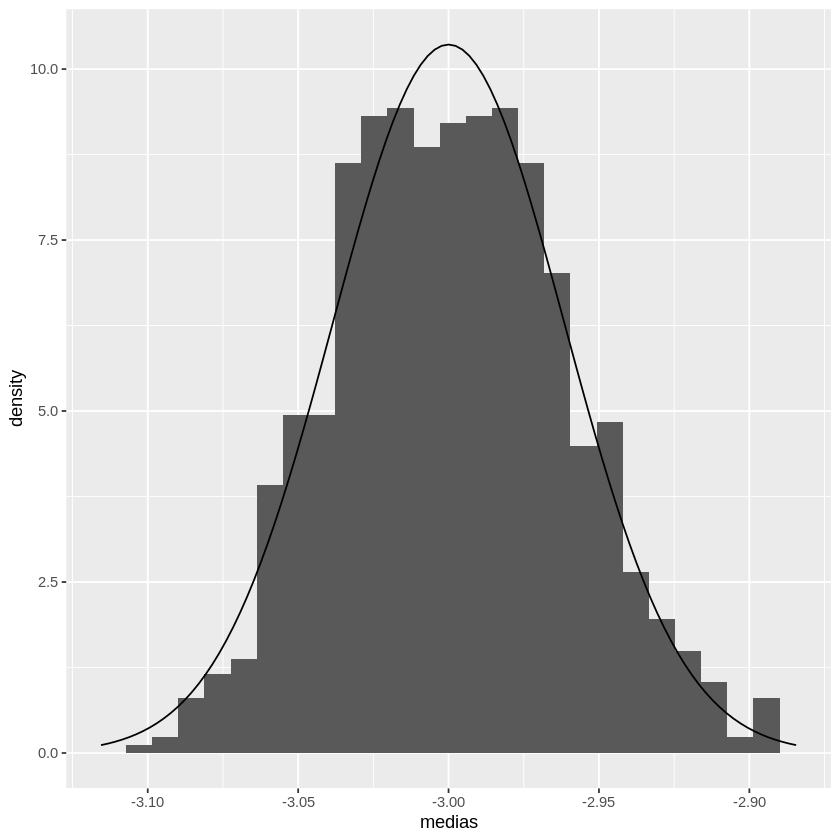

In [105]:
calc_dif_dado(10000,10000)